In [1]:
import pandas as pd

In [2]:
#LOADED
df=pd.read_csv('/kaggle/input/producthunted/2020-2022.csv')


#checked for null values.
df.isnull().sum()

df.dtypes



Unnamed: 0      int64
Date           object
ProductName    object
TagLine        object
Comments        int64
Upvotes         int64
ShortUrl       object
Month           int64
Day             int64
Year            int64
LinkStatus     object
dtype: object

In [3]:

#Leave it 
#Later find multiple launches and how they have an increasing trend leaunching more on ph than one time?


#productCount=df['ProductName'].value_counts()


#multipleLaunches=df.drop[]

#print(productCount)

289     MicroAcquire
1009      Open Peeps
3974             HEY
Name: ProductName, dtype: object
18375     Tango
21326    Gwaber
17626     Sprig
Name: ProductName, dtype: object
24746                  Fitmint
28531    Numbers Search Engine
28419               Grizzly.Fi
Name: ProductName, dtype: object


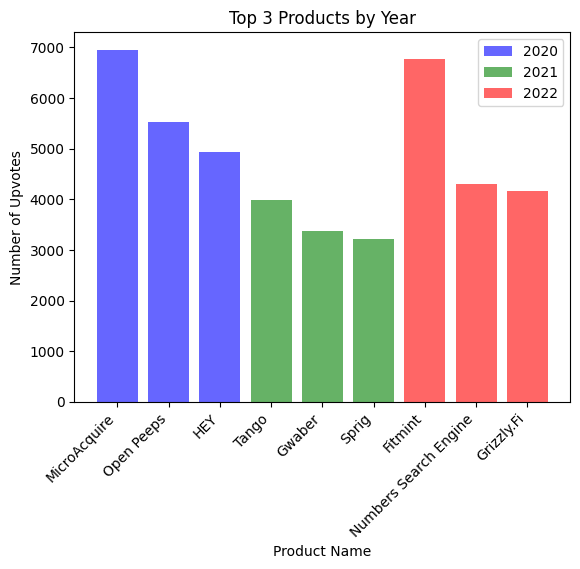

In [4]:
sorted_df=df.sort_values(by='Upvotes',ascending=False)

#sorted_df.head(10)


'''
THIS WILL WORK BUT I WANT SOMETHING EASIER SO I LEARNED MASKING

practice later but no need now.
count2020=0
count2021=0
count2022=0

top10dict={}
for row in sorted_df:
    if count2020==10 and count2020==10 and count2020==10:
        break
    
    if sorted_df['Date']==2020:
        count2020+=1
        top10dict[2020]==row
    if sorted_df['Date']==2021:
        count2020+=1
    else:
        

'''

# Create a mask for each year
# puts True in rows where year==2020 etc.. 
mask_2020 = sorted_df['Year'] == 2020
mask_2021 = sorted_df['Year'] == 2021
mask_2022 = sorted_df['Year'] == 2022


#print(mask_2020)

# Apply the masks and select the top 10 products for each year

top_50_2020 = sorted_df[mask_2020].head(3)
top_50_2021 = sorted_df[mask_2021].head(3)
top_50_2022 = sorted_df[mask_2022].head(3)


print(top_50_2020['ProductName'])
print(top_50_2021['ProductName'])
print(top_50_2022['ProductName'])


product_names_2020 = top_50_2020['ProductName']
product_names_2021 = top_50_2021['ProductName']
product_names_2022 = top_50_2022['ProductName']


#PLOT

import matplotlib.pyplot as plt


# Extract product names and their corresponding upvotes for each year
product_names_2020 = top_50_2020['ProductName']
upvotes_2020 = top_50_2020['Upvotes']

product_names_2021 = top_50_2021['ProductName']
upvotes_2021 = top_50_2021['Upvotes']

product_names_2022 = top_50_2022['ProductName']
upvotes_2022 = top_50_2022['Upvotes']

# Create a list of years for the x-axis
years = ['2020', '2021', '2022']

# Create subplots
fig, ax = plt.subplots()

# Plot the top products for each year with different colors
ax.bar(product_names_2020, upvotes_2020, label='2020', alpha=0.6, color='b')
ax.bar(product_names_2021, upvotes_2021, label='2021', alpha=0.6, color='g')
ax.bar(product_names_2022, upvotes_2022, label='2022', alpha=0.6, color='r')

# Add labels and title
ax.set_xlabel('Product Name')
ax.set_ylabel('Number of Upvotes')
ax.set_title('Top 3 Products by Year')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show legend
ax.legend()

# Display the graph
plt.show()

In [5]:
# Determine the optimal number of clusters using the Elbow Method
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans 

In [6]:




# Preprocess the taglines and convert to TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the number of features
tagline_tfidf = tfidf_vectorizer.fit_transform(df['TagLine'])

# Choose the number of clusters (you can adjust this)
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tagline_tfidf)

# Add cluster labels to your DataFrame
df['Cluster'] = kmeans.labels_

# Print the DataFrame with cluster labels
print(df[['TagLine', 'Cluster']])



/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                                 TagLine  Cluster
0      All in one resource for finding everything abo...        2
1      Simple & beautiful habit tracker for the Web, ...        0
2              If you drink, drink mindfully, drink less        4
3      A free micro journaling app with minimalistic ...        4
4          A simple and effective way to keep your goals        3
...                                                  ...      ...
32566                           IT has never been easier        4
32567  Helps Spanish immigrants write natural & engag...        4
32568      Gmax CRM is an open source invoicing software        4
32569       SpotnEats developing customized apps for you        2
32570  Calculate your drink’s ABV with this handy cal...        4

[32571 rows x 2 columns]


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


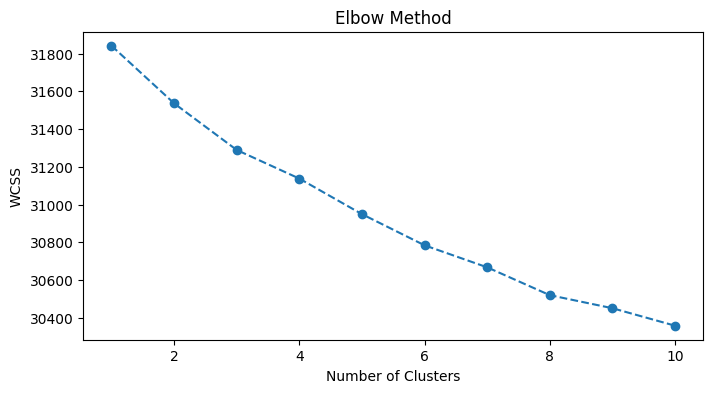

In [7]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(tagline_tfidf)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

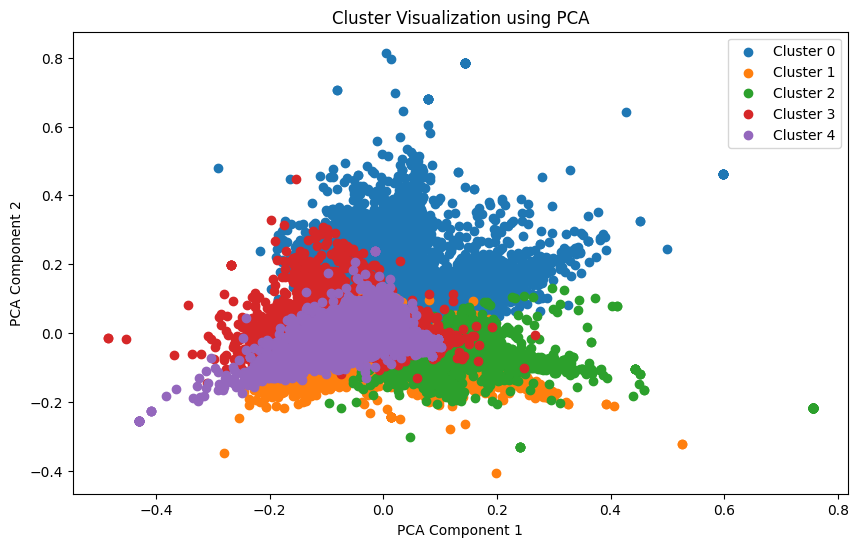

In [8]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensionality for visualization
pca = PCA(n_components=2)
tagline_pca = pca.fit_transform(tagline_tfidf.toarray())

# Add PCA components as new columns in the DataFrame
df['PCA1'] = tagline_pca[:, 0]
df['PCA2'] = tagline_pca[:, 1]

# Plot clusters using PCA components
plt.figure(figsize=(10, 6))
for cluster_num in range(num_clusters):
    cluster_data = df[df['Cluster'] == cluster_num]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster_num}')

plt.title('Cluster Visualization using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()
